In [1]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm

In [2]:
df_prob = []
for line in open("disk/data/p_pro_hillary_anti_trump"):
    w = line.strip()

In [8]:
%run head data/p_pro_hillary_anti_trump.txt

In [4]:
len(probs)

170902883

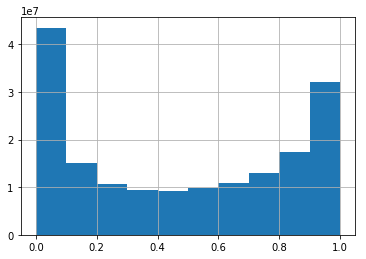

In [5]:
probs.hist()

In [3]:
def get_users_camp(p):
    d = json.load(open(f"../russian_trolls/disk/user_hillary_trump-{p}.json"))
    users = []
    for u, v in tqdm(d.items()):
#         if v[0] == 0 and v[1] == 0:
#             continue
        if v[0] > v[1]:
            users.append({"uid": u, "Camp": "C"})
        elif v[0] < v[1]:
            users.append({"uid": u, "Camp": "T"})
        else:
            users.append({"uid": u, "Camp": "U"})
    users = pd.DataFrame(users).set_index("uid")
    print(users.Camp.value_counts(normalize=True))    
    print(users.Camp.value_counts())

In [36]:
get_users_camp(p=0.5)

100%|██████████| 10941026/10941026 [00:04<00:00, 2435248.93it/s]


C    0.650127
T    0.276310
U    0.073563
Name: Camp, dtype: float64
C    7113057
T    3023112
U     804857
Name: Camp, dtype: int64


In [39]:
get_users_camp(p=0.75)

100%|██████████| 10941026/10941026 [00:04<00:00, 2318852.74it/s]


C    0.532102
U    0.262618
T    0.205280
Name: Camp, dtype: float64
C    5821738
U    2873313
T    2245975
Name: Camp, dtype: int64


In [ ]:
df_proba1 = pd.read_pickle("/media/alex/data/election_data/data/complete_trump_vs_hillary/df_proba_corrected_official_client_june1_sep1_signi_final_2.pickle")
df_proba2 = pd.read_pickle("/media/alex/data/election_data/data/complete_trump_vs_hillary_sep-nov/df_proba_corrected_official_client_sep1_nov9_signi_final.pickle")
df_proba = pd.concat([df_proba1, df_proba2])
# df_proba = df_proba.set_index("tweet_id")

In [ ]:
df_proba2

## cumulative prediction (time series)

In [11]:
from datetime import datetime, timedelta

def get_users_camp(d, dt):
    _users = Counter()
    for u, v in d.items():
#         if v[1] + v[0] <= 100:
#             continue
        if v[1] > v[0]:
            _users["Clinton"] += 1
        elif v[0] > v[1]:
            _users["Trump"] += 1
        else:
            _users["Others"] += 1
    _users = dict(_users)
    _users["dt"] = dt.strftime("%Y-%m-%d")
    print(_users)
    
    
def predict_cumulative(df_proba):
    start = datetime(2016, 6, 1)
    dt = start
    users = {}

    while dt < datetime(2016, 11, 9):
        end = start + timedelta(days=1)
        dt = start
        df_tmp = df_proba[(df_proba.datetime_EST >= start) & (df_proba.datetime_EST < end)]
        start = end

        for row in df_tmp.itertuples():
            p = row.p_pro_hillary_anti_trump
            u = row.user_id
            if u not in users:
                users[u] = [0, 0]
            if p > 0.5: # Clinton
                users[u][1] += 1
            elif p <= 0.5: # Trump
                users[u][0] += 1
        get_users_camp(users, dt)

In [37]:
rsts = []
for line in open("data/us-culmulative-from-sep.json"):
    d = json.loads(line.strip())
    rsts.append(d)
rsts = pd.DataFrame(rsts)
rsts.dt = pd.to_datetime(rsts.dt)
rsts = rsts.set_index("dt")

In [ ]:
rsts

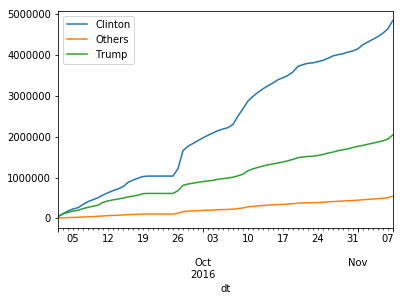

In [39]:
rsts.plot()

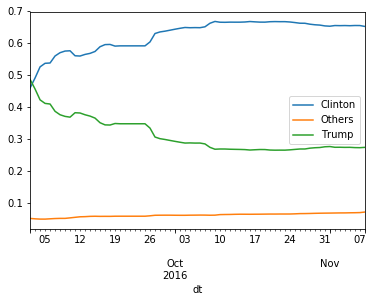

In [41]:
rsts.div(rsts.sum(axis=1), axis=0).plot()

In [8]:
rsts = []
for line in open("data/us-cul-from-june.json"):
    d = json.loads(line.strip())
    rsts.append(d)
rsts = pd.DataFrame(rsts)
rsts.dt = pd.to_datetime(rsts.dt)
rsts = rsts.set_index("dt")

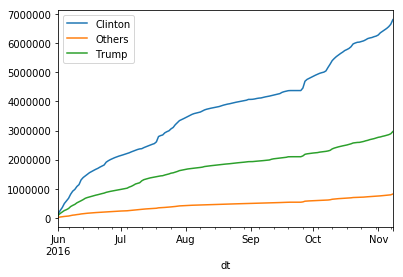

In [9]:
rsts.plot()

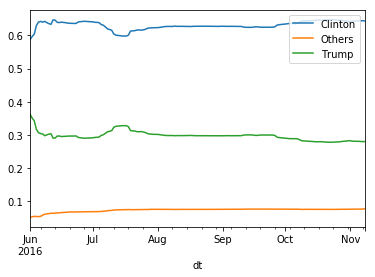

In [10]:
rsts.div(rsts.sum(axis=1), axis=0).plot()

In [3]:
# df_proba.to_pickle("disk/data/df_proba_corrected_official_client_june1_nov9_signi_final.pickle")
# df_proba = pd.read_pickle("disk/data/df_proba_corrected_official_client_june1_nov9_signi_final.pickle")
df_proba_7 = df_proba[(df_proba.p_pro_hillary_anti_trump > 0.7) | (df_proba.p_pro_hillary_anti_trump < 0.3)]
len(df_proba_7)

In [ ]:
df_proba = pd.read_pickle("disk/data/df_proba_corrected_official_client_june1_nov9_signi_final.pickle")
len(df_proba)

In [17]:
# df_proba_75 = df_proba[df_proba.p_pro_hillary_anti_trump > 0.75]
# df_proba_25 = df_proba[df_proba.p_pro_hillary_anti_trump < 0.25]

df_proba_7 = df_proba[(df_proba.p_pro_hillary_anti_trump > 0.7) | (df_proba.p_pro_hillary_anti_trump < 0.3)]
len(df_proba_7)

107917516

In [ ]:
df_proba_75.groupby("user_id").count()

In [9]:
df_proba_tmp = df_proba[(df_proba.datetime_EST >= "2016-06-01 00:00:00") & (df_proba.datetime_EST < "2016-06-02 00:00:00")]

In [8]:
#** user classification **

_p = 0.7
users = {}
for row in tqdm(df_proba.itertuples()):
    p = row.p_pro_hillary_anti_trump
    u = row.user_id
    if u not in users:
        users[u] = [0, 0]
    if p > _p: # Clinton
        users[u][1] += 1
    elif p < 1 - _p: # Trump
        users[u][0] += 1
#     else: # Others
#         users[u][2] += 1

## Average probs for classification

In [4]:
#** user classification **

_p = 0.5
users = {}
for row in tqdm(df_proba.itertuples()):
    p = row.p_pro_hillary_anti_trump
    u = row.user_id
    if u not in users:
        users[u] = [p]
    else:
        users[u].append(p)

In [6]:
for u, v in tqdm(users.items()):
    users[u] = np.array(v).mean()

In [8]:
_users = []
for u, v in users.items():
    if v > 0.5:
        _users.append({"uid": u, "prob": v, "camp": "Clinton"})
    else:
        _users.append({"uid": u, "prob": v, "camp": "Trump"})

In [ ]:
users_ave_prob = pd.DataFrame(_users).set_index("uid")
users_ave_prob

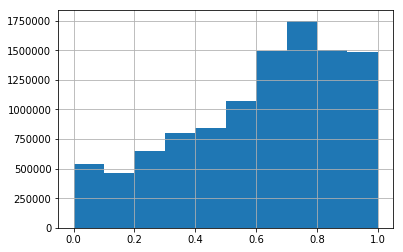

In [11]:
users_ave_prob.prob.hist()

In [16]:
users_ave_prob.camp.value_counts(normalize=True)

Clinton    0.689046
Trump      0.310954
Name: camp, dtype: float64

In [17]:
def get_users_camp_v2(d):
    _users = []
    for u, v in tqdm(d.items()):
#         if v[0] == 0 and v[1] == 0:
#             continue
        if v[1] > v[0]:
            _users.append({"uid": u, "Camp": "Clinton"})
        elif v[0] > v[1]:
            _users.append({"uid": u, "Camp": "Trump"})
        else:
            _users.append({"uid": u, "Camp": "Others"})
    _users = pd.DataFrame(_users).set_index("uid")
    # _users.to_pickle("disk/data/df_users_remove_hillary_p=.7.pl")
    # print(_users.Camp.value_counts(normalize=True))
    print({"Trump": _users.Camp.count("Trump"), "Clinton": _users.Camp.count("Clinton"), "Others": _users.Camp.count("Others")})

In [10]:
# remove Hillary

get_users_camp_v2(d=users)


Clinton    0.570179
Trump      0.218470
Others     0.211351
Name: Camp, dtype: float64
Clinton    4240205
Trump      1624674
Others     1571738
Name: Camp, dtype: int64


In [13]:
# 0.7, keep Hillary

get_users_camp_v2(d=users)


C    0.565852
U    0.219408
T    0.214740
Name: Camp, dtype: float64
C    5994865
U    2324495
T    2275044
Name: Camp, dtype: int64


## remove query of Hillary, Clinton and HillaryClinton

In [3]:
df_proba = pd.read_pickle("disk/data/df_proba_corrected_official_client_june1_nov9_signi_final.pickle")
len(df_proba)

158322365

In [5]:
len(df_proba.user_id.value_counts())

10594404

In [6]:
tweet_ids_only_Hillary = [int(line.strip()) for line in open("disk/data/hillary_ids_ignore.txt")]

In [7]:
df_proba = df_proba[~df_proba.index.isin(tweet_ids_only_Hillary)]
len(df_proba)

91498580

In [22]:
users = pd.read_pickle("disk/data/df_users_remove_hillary_p=.7.pl")

In [53]:
tweet_ids_only_Hillary = [int(line.strip()) for line in open("disk/data/only_hillary_ids.txt")]

In [52]:
tweet_ids_only_clinton = [int(line.strip()) for line in open("disk/data/only_Clinton_ids.txt")]

In [30]:
tweet_ids_only_hillaryclinton = [int(line.strip()) for line in open("disk/data/only_hillaryclinton_ids.txt")]

In [54]:
tweet_ids_only_trump = [int(line.strip()) for line in open("disk/data/only_trump_ids.txt")]

In [6]:
bots_tids = [int(line.strip().split("\t")[0]) for line in open("disk/data/unofficial_clients_tid.txt")]

In [8]:
bots_uids = [int(line.strip().split("\t")[0]) for line in open("disk/data/unofficial_clients_uid.txt")]

In [18]:
df_proba = df_proba[df_proba.index.isin(tweet_ids_only_Hillary)]
len(df_proba)

17969258

In [ ]:
df_proba = df_proba[(df_proba.index.isin(tweet_ids_only_Hillary)) & (df_proba.index.isin(tid))]
len(df_proba)

In [26]:
df_proba = df_proba[df_proba.index.isin(tweet_ids_only_clinton)]
len(df_proba)

12445914

In [31]:
df_proba = df_proba[df_proba.index.isin(tweet_ids_only_hillaryclinton)]
len(df_proba)

10970769

In [5]:
df_proba = df_proba[df_proba.index.isin(tweet_ids_only_trump)]
len(df_proba)

69845810

## Trump (query)

In [21]:
word_count = Counter()

for line in tqdm(open("disk/data/only_trump_words.txt")):
    words = line.strip().split()
    for w in words:
        if w.startswith("#"):
            word_count[w] += 1

In [22]:
from nltk.corpus import stopwords
import string

stopwords = set(stopwords.words('english')) | set(string.punctuation)

In [ ]:
for w, n in word_count.most_common(500):
    if w not in stopwords:
        print(w, n, sep="\t")

In [27]:
client_count = Counter()

for line in tqdm(open("disk/data/only_trump_clients.txt")):
    w = line.strip().split("\t")[1]
    client_count[w] += 1

In [ ]:
client_count.most_common(50)

In [9]:
df_proba_people = df_proba[~df_proba.user_id.isin(bots_uids)]

In [12]:
predict_cumulative(df_proba_people)

{'Others': 10268, 'Trump': 73060, 'Clinton': 121679, 'dt': '2016-06-01'}
{'Others': 19821, 'Trump': 132043, 'Clinton': 229323, 'dt': '2016-06-02'}
{'Clinton': 327168, 'Trump': 182262, 'Others': 28731, 'dt': '2016-06-03'}
{'Clinton': 464422, 'Trump': 229195, 'Others': 38901, 'dt': '2016-06-04'}
{'Clinton': 549605, 'Trump': 258108, 'Others': 45100, 'dt': '2016-06-05'}
{'Clinton': 637288, 'Trump': 296722, 'Others': 52929, 'dt': '2016-06-06'}
{'Clinton': 773747, 'Trump': 362135, 'Others': 69303, 'dt': '2016-06-07'}
{'Clinton': 877598, 'Trump': 402388, 'Others': 82318, 'dt': '2016-06-08'}
{'Clinton': 936118, 'Trump': 436409, 'Others': 89885, 'dt': '2016-06-09'}
{'Clinton': 1035858, 'Trump': 489107, 'Others': 101791, 'dt': '2016-06-10'}
{'Clinton': 1098671, 'Trump': 522612, 'Others': 109897, 'dt': '2016-06-11'}
{'Clinton': 1259713, 'Trump': 560108, 'Others': 123166, 'dt': '2016-06-12'}
{'Clinton': 1339492, 'Trump': 598029, 'Others': 132103, 'dt': '2016-06-13'}
{'Clinton': 1394537, 'Trump': 6

KeyboardInterrupt: 

In [2]:
client_count = Counter()

for line in tqdm(open("disk/data/unofficial_clients_only_hillary.txt")):
    w = line.strip().split("\t")[1]
    client_count[w] += 1

In [6]:
sum(client_count.values())

999378

## Bots influence results??

In [2]:
real_id = set()
bots_id = set()

for line in open("disk/data/tweetid_clientid.txt"):
    w = line.strip().split("\t")
    if w[1] == "0":
        bots_id.add(w[0])
    else:
        real_id.add(w[0])

In [ ]:
all_id = real_id | bots_id

In [9]:
len(all_id), len(real_id), len(bots_id)

(173402944, 160930761, 12472183)

1. total: 173402944
2. real people: 160930761
3. bots: 12472183

In [5]:
trump_id = {line.strip() for line in open("disk/data/tweetid_trump.txt")}
hillary_id = all_id - trump_id

In [8]:
len(trump_id), len(hillary_id)

(87637193, 85765751)

- trump: 87637193
- hillary: 85765751

In [11]:
len(bots_id & trump_id), len(bots_id & hillary_id)

(5184202, 7287981)

In [ ]:
for line in open("disk/data")